#### libics: drivers

# Vialux V-7000 / Texas Instruments DLP7000

Product homepage: [Vialux V-7000](https://www.vialux.de/de/hi-speed-v-module.html)

### Imports

In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt

from libics import env
from libics.drv import drv
from libics.drv.itf import itf
from libics.data import types, dataset, stp
from libics.display import plot, plotdefault
from libics.file import hdf

### Configuration

In [2]:
itf_cfg = {
    "protocol": itf.ITF_PROTOCOL.BINARY,
    "interface": itf.ITF_BIN.VIALUX,
    "device": None
}
itf_cfg = itf.ProtocolCfgBase(**itf_cfg).get_hl_cfg()

In [8]:
drv_cfg = {
    "driver": drv.DRV_DRIVER.DSP,
    "interface": itf_cfg,
    "identifier": "dmd_vialux_v7000_texasinstruments_dlp7000",
    "model": drv.DRV_MODEL.TEXASINSTRUMENTS_DLP7000,
    "pixel_hrzt_count": 1024,
    "pixel_hrzt_size": 13.68e-6,
    "pixel_hrzt_offset": 0,
    "pixel_vert_count": 768,
    "pixel_vert_size": 13.68e-6,
    "pixel_vert_offset": 0,
    "format_color": drv.DRV_DSP.FORMAT_COLOR.BW,
    "channel_bitdepth": 1,
    "picture_time": 1,
    "dark_time": 0,
    "sequence_repetitions": 0,
    "temperature": 25.0
}
drv_cfg = drv.DrvCfgBase(**drv_cfg).get_hl_cfg()

### Setup

In [9]:
dsp = drv.DrvBase(cfg=drv_cfg).get_drv()
sleep_time = 20.0

### Script

##### Create data

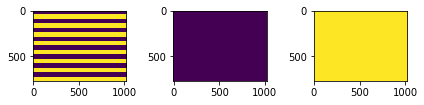

In [10]:
val = 96
im1 = np.arange(1024 * 768, dtype=float).reshape((1024, 768))
im1[im1 % val < val / 2] = 0
im1[im1 % val >= val / 2] = 1
plt.subplot(131)
plt.imshow(im1.T, vmin=0, vmax=1)
im2 = np.full((1024, 768), 0, dtype=float)
plt.subplot(132)
plt.imshow(im2.T, vmin=0, vmax=1)
im3 = np.full((1024, 768), 1, dtype=float)
plt.subplot(133)
plt.imshow(im3.T, vmin=0, vmax=1)
plt.tight_layout()
im = [im1, im2, im3]

##### Set image

In [11]:
with dsp:
    dsp.init(im)
    dsp.write_all()
    dsp.run()
    time.sleep(sleep_time)
    dsp.stop()

AlpDevAlloc: ALP_OK
AlpSeqAlloc: ALP_OK
AlpSeqTiming: ALP_OK
AlpSeqControl: ALP_OK, ALP_BIN_MODE is ALP_BIN_UNINTERRUPTED
AlpSeqTiming: ALP_OK
AlpSeqPut: ALP_OK
AlpSeqPut: ALP_OK
AlpSeqPut: ALP_OK
AlpProjStartCont: ALP_OK
AlpProjHalt: ALP_OK
AlpSeqFree: ALP_OK
AlpDevHalt: ALP_OK
AlpDevFree: ALP_NOT_AVAILABLE
